<a href="https://colab.research.google.com/github/caropeboka/data-scientist-insights/blob/main/MSIB_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI - AI Hacker


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import OneHotEncoder
my_palette = ["#7A92FF", "#FF7AEF", "#B77AFF", "#A9FF7A", "#FFB27A", "#FF7A7A", "#7AFEFF", "#D57AFF", "#FFD7FA", "#D3FF7A"]
import warnings
warnings.filterwarnings("ignore")

Load data

In [ ]:
data = pd.read_csv("drive/MyDrive/Dataset/ds_salaries.csv")
data = data.drop("Unnamed: 0", axis = 1)
data.head

<bound method NDFrame.head of      work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_cu

In [ ]:
data = data.drop(['salary', 'salary_currency'], axis = 1)
data.rename(columns = {'salary_in_usd':'Salary'}, inplace = True)
data.head()

,work_year,experience_level,employment_type,job_title,Salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [ ]:
data.shape

(607, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   Salary              607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [ ]:
data["Salary"].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: Salary, dtype: float64

In [ ]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
Salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Uni-variate Analysis

What is the distribution of Categorical Variables?

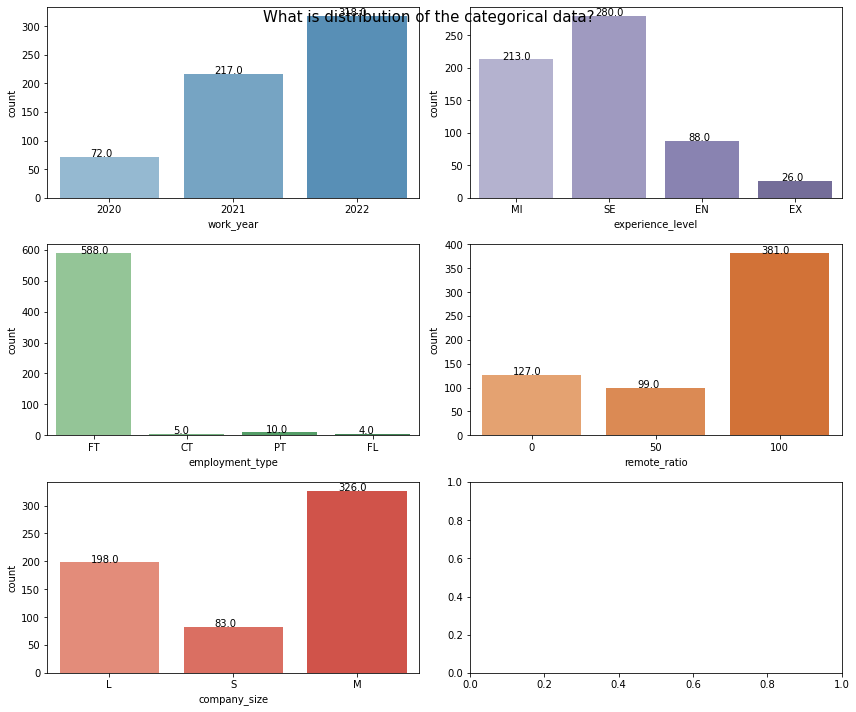

In [ ]:
figure, axes=plt.subplots(3,2,figsize=(12,10))
ax1=sns.countplot(ax=axes[0,0],data=data, x="work_year",palette=sns.color_palette('Blues_d'))
ax2=sns.countplot(ax=axes[0,1],x="experience_level",data=data,palette=sns.color_palette('Purples_d'))
ax3=sns.countplot(ax=axes[1,0],data=data, x="employment_type",palette=sns.color_palette('Greens_d'))
ax4=sns.countplot(ax=axes[1,1],data=data, x="remote_ratio",palette=sns.color_palette('Oranges_d'))
ax5=sns.countplot(ax=axes[2,0],data=data, x="company_size",palette=sns.color_palette('Reds_d'))
for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax3.patches:
   ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax4.patches:
   ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax5.patches:
   ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
figure.suptitle("What is distribution of the categorical data?", fontsize=15)
plt.show()

Observations:

*   Work year: More than half the data is from the year 2022. And less than 12% of the data is of the year 2020. Possible conclusions: is that more job vacancy in Data Science in 2022 or not enough data for 2020

*   Experience Level: Only 4% of the data is of professionals at executive level. This may cause bias towards SE (senior level)

*   Employment type: More than 90% of the data contains Full-time employment. Possible Conclusions: That most people prefer to be full time employees probably due to job security.

*   Remote Ratio: With the possibilty of working online with the comfort of sitting at home, people now mostly prefer working from home rather than in office.

*   Company Size: Either the data is not enough or medium sized companies recruit more people in data science

What are the most popular roles in Data Science?

<function matplotlib.pyplot.show(*args, **kw)>

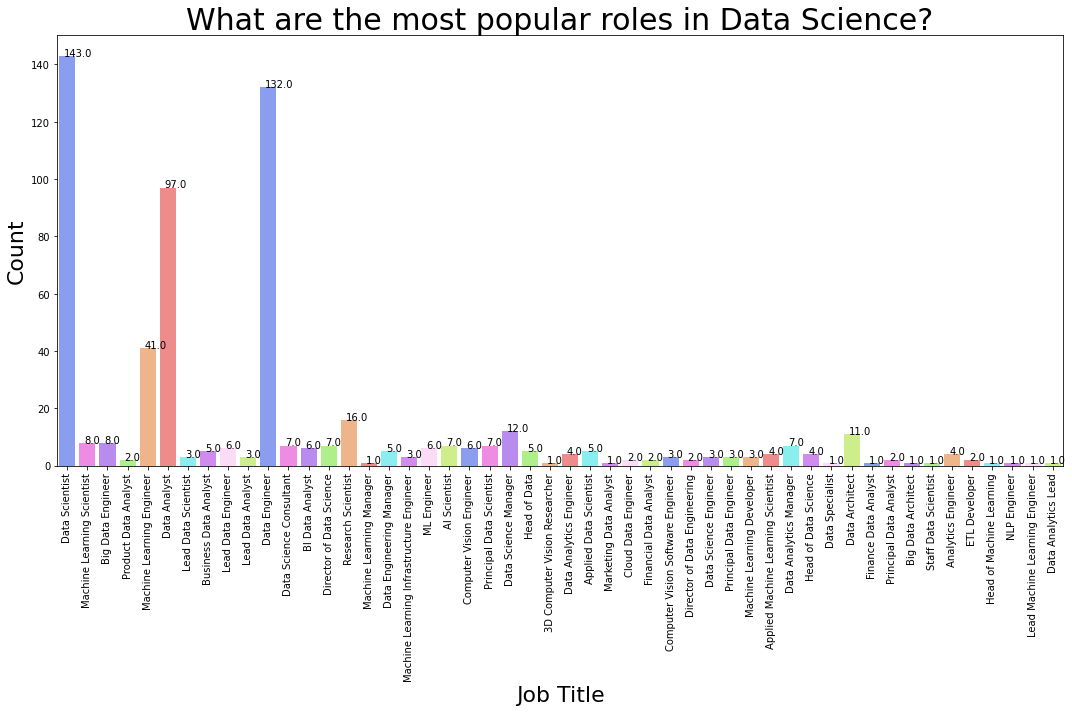

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x="job_title", palette=my_palette)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90)
plt.title("What are the most popular roles in Data Science?", fontsize=30)
plt.xlabel("Job Title", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.show

Observations:

*   Top jobs in Data Science are Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer and Research Scientist

One non-quantative observation that I made from the above graph is the number of roles in Data Science! Don't limit your search for jobs just to the top five!


Which country hires most people in Data Science?

<function matplotlib.pyplot.show(*args, **kw)>

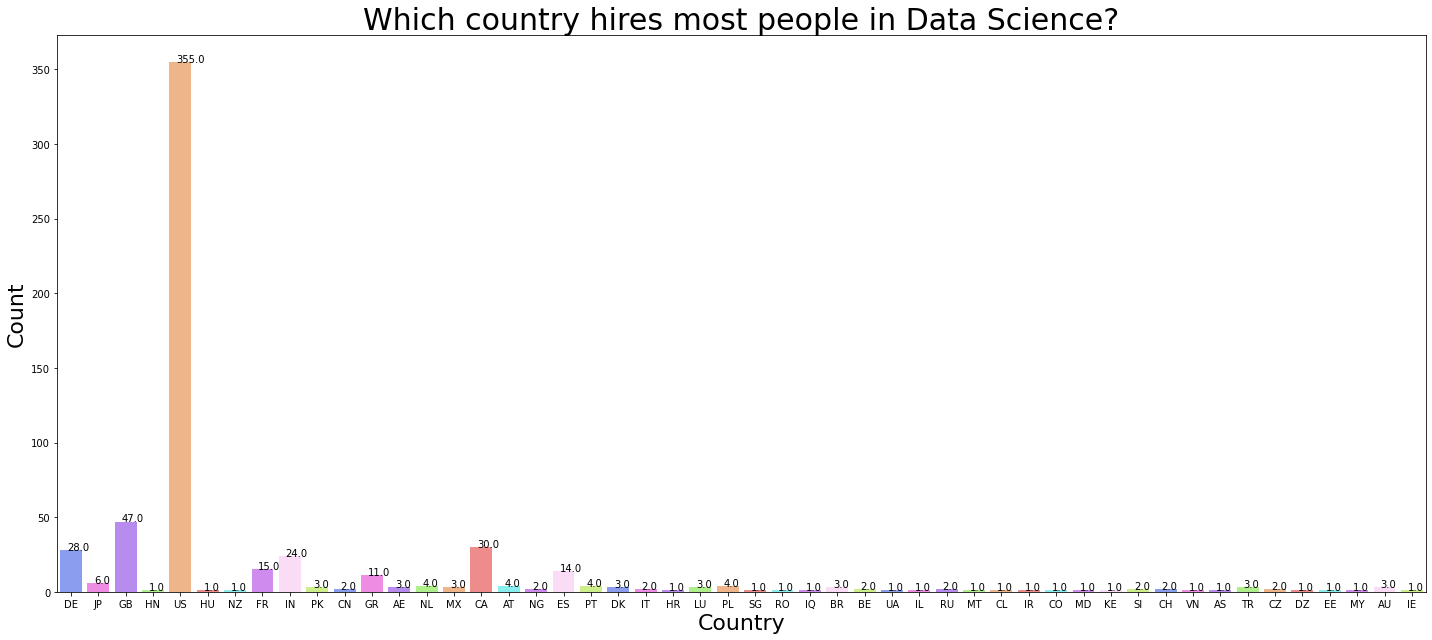

In [ ]:
plt.figure(figsize=(20,9))
ax=sns.countplot(data=data, x="company_location", palette = my_palette)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title("Which country hires most people in Data Science?", fontsize=30)
plt.xlabel("Country", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.show

Observations:

*   USA hires most people in Data Science followed by the UK, Canada, Denmark and India.

Note: Data may not be enough and might be baised towards USA


What is the Distibution of Salaries

Text(0, 0.5, 'Density')

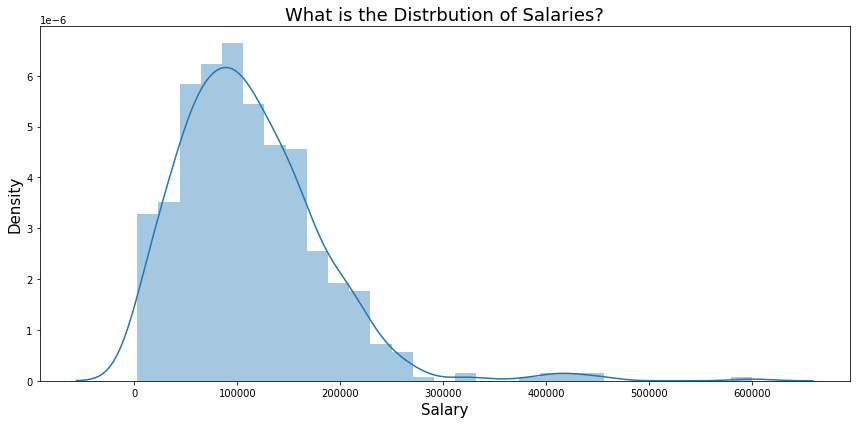

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data["Salary"])
plt.title("What is the Distrbution of Salaries?", fontsize=18)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Density", fontsize=15)

Bi-variate Analysis

How much can you expect depending on your years of experience?

In [ ]:
def univariate_multi_plot(df=data, x=None, xlabel=None, y=None,ylabel=None,palette=None,title=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.boxplot(data=data, x=x, ax=ax[0], y=y,palette=palette)
    sns.stripplot(data=data,x=x,ax=ax[1],y=y,palette=palette)
    ax[0].set_xlabel(xlabel=xlabel, size=15)
    ax[0].set_ylabel(ylabel=ylabel,size=15)
    ax[1].set_xlabel(xlabel=xlabel, size=15)
    ax[1].set_ylabel(ylabel=ylabel,size=15)
    fig.suptitle(title, fontsize=20)

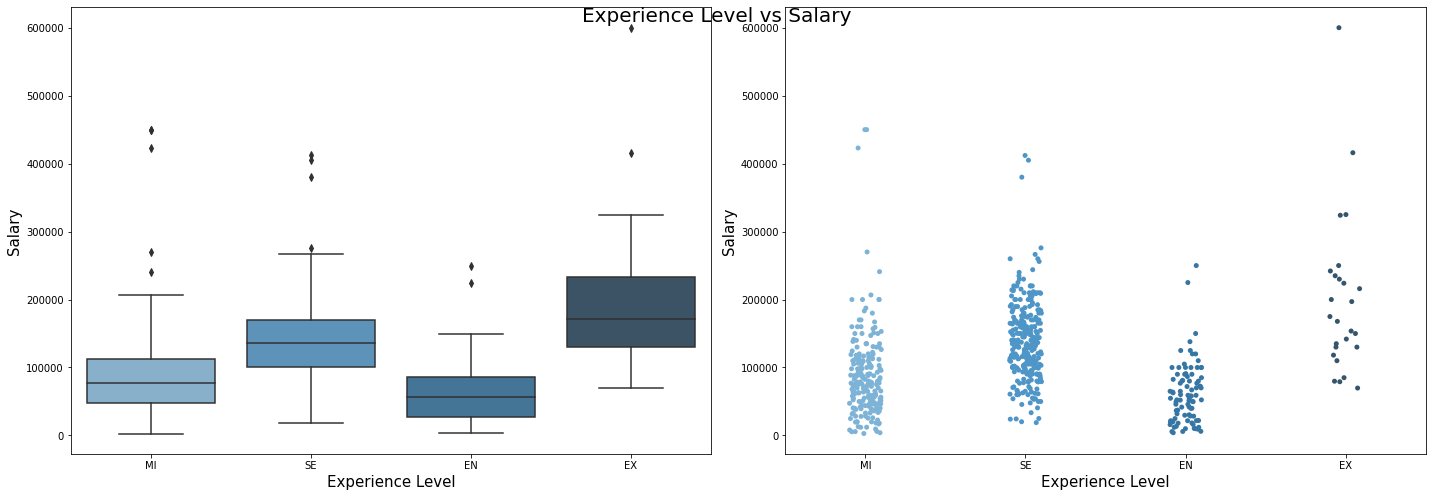

In [ ]:
univariate_multi_plot(x="experience_level", xlabel="Experience Level", y="Salary", ylabel="Salary", palette="Blues_d", title="Experience Level vs Salary")

Observations:

Median salary for a graduate right out of university is around 50000 dollars and over the years with more work experience if make your way to executive you can earn more than 200000 dollars. And if you are a workoholic and have exceptional skills in DS you can make up to $600000!


Which year did people prefer to stay at home the most?

Text(0.5, 20.80000000000002, 'Count')

<Figure size 1440x648 with 0 Axes>

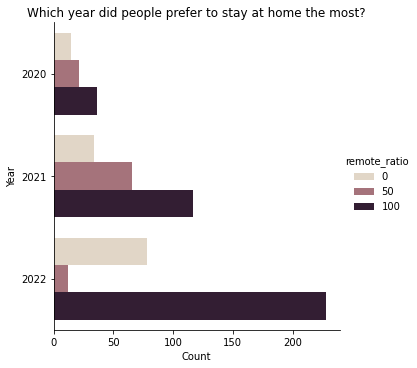

In [ ]:
plt.figure(figsize=(20,9))
sns.catplot(y="work_year", hue="remote_ratio", kind="count",
            palette="ch:.25",
            data=data)
plt.title("Which year did people prefer to stay at home the most?")
plt.ylabel("Year")
plt.xlabel("Count")

Observations:

This data might be biased towards 2022 as more than 50% of the data is of the year 2022. But observing the current scenario we can also conclude that more and more people now prefer to work from home

Which country has the highest pay?

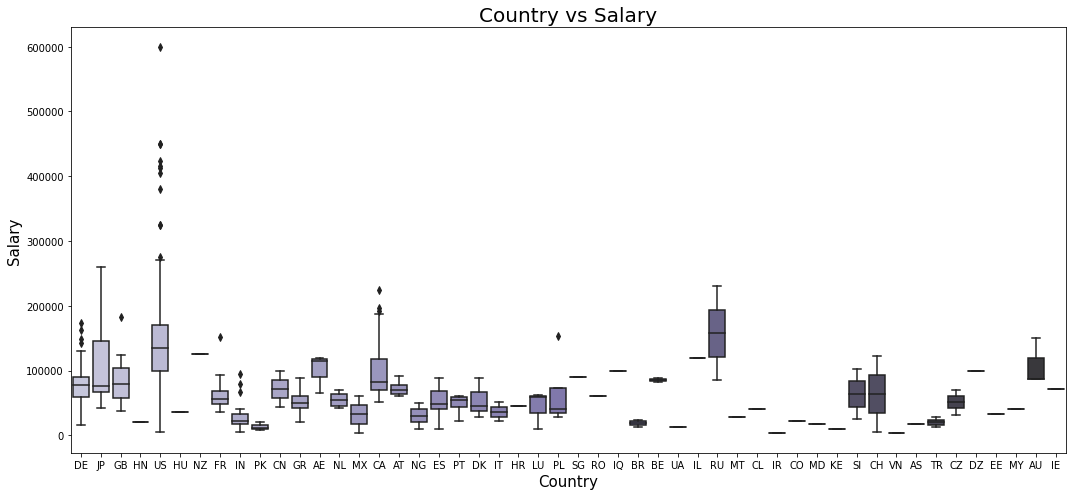

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data, x='company_location', y="Salary", palette="Purples_d")
plt.xlabel("Country", fontsize=15)
plt.ylabel("Salary", fontsize=15)
plt.title("Country vs Salary", fontsize=20)
plt.show()

Observations:

Highest median salary for DS are provided by USA and Russia. But since Russia was only 1% of the data, this observation might too be biased. If we had more data, the median salary in Russia might shift upwards or downwards.

Which job title has the highest pay?

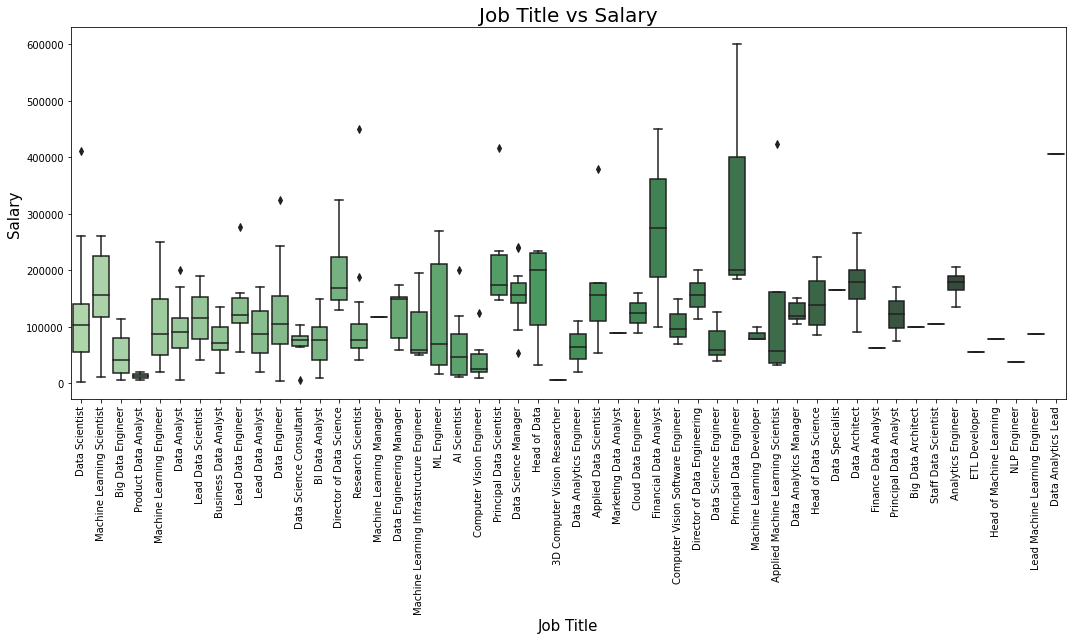

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(data=data, x='job_title', y='Salary', palette="Greens_d")
plt.xticks(rotation = 90)
plt.xlabel("Job Title", fontsize = 15)
plt.ylabel("Salary", fontsize = 15)
plt.title("Job Title vs Salary", fontsize = 20)
plt.show()

Observations:

Highest median salary for DS are provided by USA and Russia. But since Russia was only 1% of the data, this observation might too be biased. If we had more data, the median salary in Russia might shift upwards or downwards.

Which year was best for Data Science?

<function matplotlib.pyplot.show(*args, **kw)>

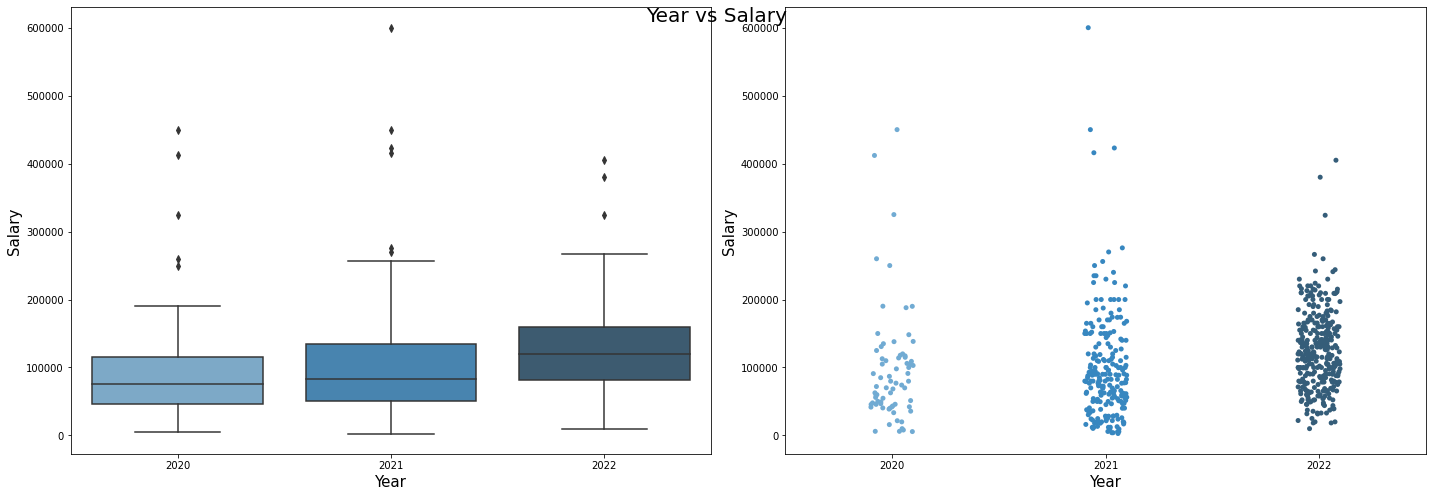

In [ ]:
univariate_multi_plot(x="work_year", y="Salary", palette="Blues_d", title="Year vs Salary", xlabel="Year", ylabel="Salary")
plt.show

Observations:

Salary for people in Data Science has increased over the years 2020-2022 gradually.

Freelancing: worth it or not?

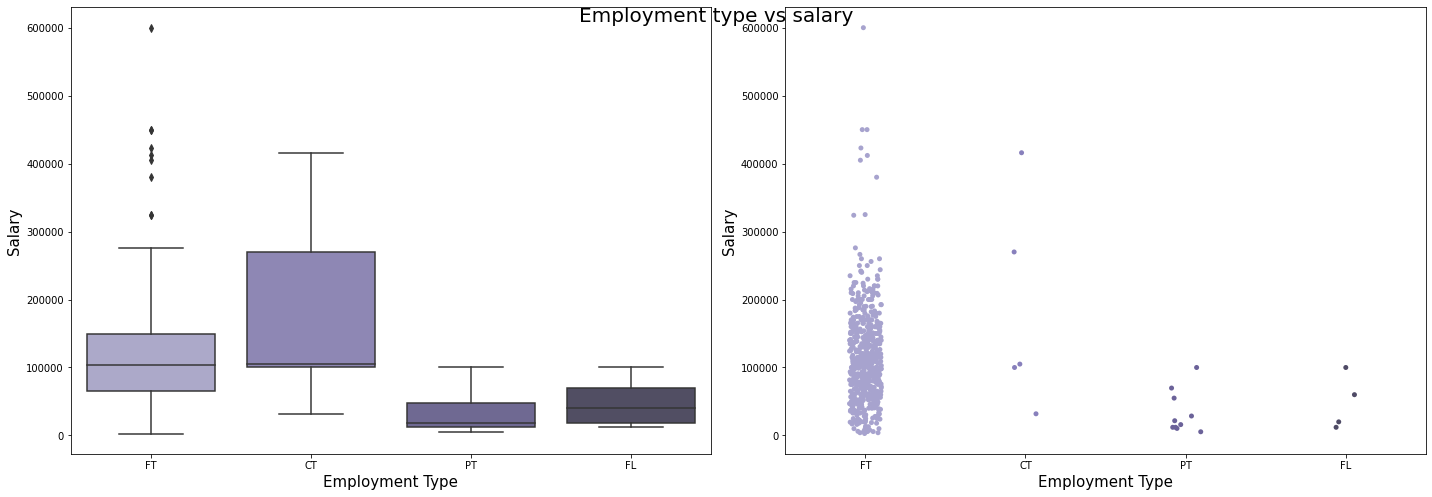

In [ ]:
univariate_multi_plot(x="employment_type", y="Salary", xlabel="Employment Type", ylabel="Salary", palette="Purples_d", title="Employment type vs salary")
plt.show()


Observations:


*   Median salary for Full-time employees is around 100000 dollars.
*   Here the data is highly biased due to lack of enough rows for employment type other than Full-time. So to answer if freelancing is worth it or not won't be possible.

In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'Salary', 'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
data['work_year']=data['work_year'].astype('category')
data['experience_level']=data['experience_level'].astype('category')
data['employment_type']=data['employment_type'].astype('category')
data['job_title']=data['job_title'].astype('category')
data['remote_ratio']=data['remote_ratio'].astype('category')
data['company_location']=data['company_location'].astype('category')
data['company_size']=data['company_size'].astype('category')
data['employee_residence']=data['employee_residence'].astype('category')

data.info()
data['work_year']=data['work_year'].cat.codes
data['experience_level']=data['experience_level'].cat.codes
data['employment_type']=data['employment_type'].cat.codes
data['job_title']=data['job_title'].cat.codes
data['remote_ratio']=data['remote_ratio'].cat.codes
data['company_location']=data['company_location'].cat.codes
data['company_size']=data['company_size'].cat.codes
data['employee_residence']=data['employee_residence'].cat.codes
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   Salary              607 non-null    int64   
 5   employee_residence  607 non-null    category
 6   remote_ratio        607 non-null    category
 7   company_location    607 non-null    category
 8   company_size        607 non-null    category
dtypes: category(8), int64(1)
memory usage: 17.8 KB


,work_year,experience_level,employment_type,job_title,Salary,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,79833,14,0,12,0
1,0,3,2,41,260000,32,0,29,2
2,0,3,2,7,109024,20,1,18,1
3,0,2,2,47,20000,23,0,20,2
4,0,3,2,38,150000,55,1,48,0


In [ ]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,work_year,experience_level,employment_type,job_title,Salary,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
Salary,0.170493,0.315312,-0.123545,0.131016,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,0.428994,0.897704,0.169083,1.000000,-0.066554
company_size,0.078764,-0.066423,0.034549,-0.031011,-0.151205,-0.081742,0.022070,-0.066554,1.000000


Salary mostly depends on the experience level that is years of experience you have in the field of data science. More years of experience, higher your salary which is obvious isn't it? It also seems to depend on company location

Salary Predictor

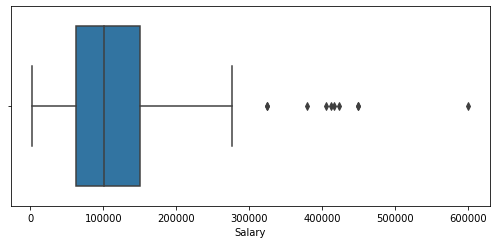

In [ ]:
sns.boxplot(x='Salary', data=data)

In [ ]:
Q1 = np.percentile(data["Salary"], 25, interpolation = 'midpoint')
Q2 = np.percentile(data["Salary"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data["Salary"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in data["Salary"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 87274.0
low_limit is -68185.0
up_limit is 280911.0
 outlier in the dataset is [325000, 450000, 412000, 450000, 423000, 416000, 600000, 324000, 380000, 405000]


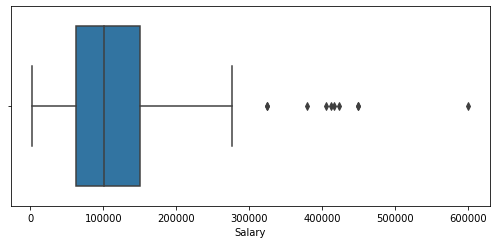

In [ ]:
sns.boxplot(x='Salary',data=data)

Feature Engineering

In [ ]:
x = data.copy(['experience_level', 'company_location', 'work_year', 'company_size'])
y = data['Salary']

Salary Predictor

In [ ]:
#Import LinearRegression and split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)

from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

5.820766091346741e-11
[-6.62708511e-13  1.16063825e-11 -2.33741517e-12  3.73615418e-13
  1.00000000e+00  1.32851629e-13  2.64172798e-13 -2.63867433e-13
  1.54842568e-13]
MSE :  2.9041226479703947e-21
RMSE :  5.3889912302493076e-11
